In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_RapportINSPQ_HistoVigie.csv', skiprows = [1])

data.head()

,Date,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Deces_Cumulatif_CHCHSLD,Nb_Deces_Cumulatif_RPA,Nb_Deces_Cumulatif_DomInc,Nb_Deces_Cumulatif_Autre,Nb_Nvx_Deces_Total,Nb_Nvx_Deces_CHCHSLD,Nb_Nvx_Deces_RPA,Nb_Nvx_Deces_DomInc,Nb_Nvx_Deces_Autre
0,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
data['Date'] = pd.to_datetime(data['Date'])

data.rename(columns = {
    'Nb_Nvx_Cas':'Nb_New_Cases'
}, inplace = True)

In [4]:
data_2020_2021 = data[data['Date'].dt.year < 2022]

In [5]:
data_march = data_2020_2021[(data_2020_2021['Date'].dt.month == 3) | (data_2020_2021['Date'].dt.month == 4)][['Date', 'Nb_New_Cases']]

date1 = data_march[(data_march['Date'] >= '2020-03-20') & (data_march['Date'] <= '2020-04-16')]

In [6]:
date_september = data_2020_2021[(data_2020_2021['Date'].dt.month == 8) | (data_2020_2021['Date'].dt.month == 9)][['Date', 'Nb_New_Cases']]

date2 = date_september[(date_september['Date'] >= '2020-08-31') & (date_september['Date'] <= '2020-09-27')]

In [7]:
date_december = data_2020_2021[((data_2020_2021['Date'].dt.month == 1) & (data_2020_2021['Date'].dt.year == 2021)) | ((data_2020_2021['Date'].dt.month == 12) & (data_2020_2021['Date'].dt.year == 2020))][['Date', 'Nb_New_Cases']]

date3 = date_december[(date_december['Date'] >= '2020-12-25') & (date_december['Date'] <= '2021-01-21')]

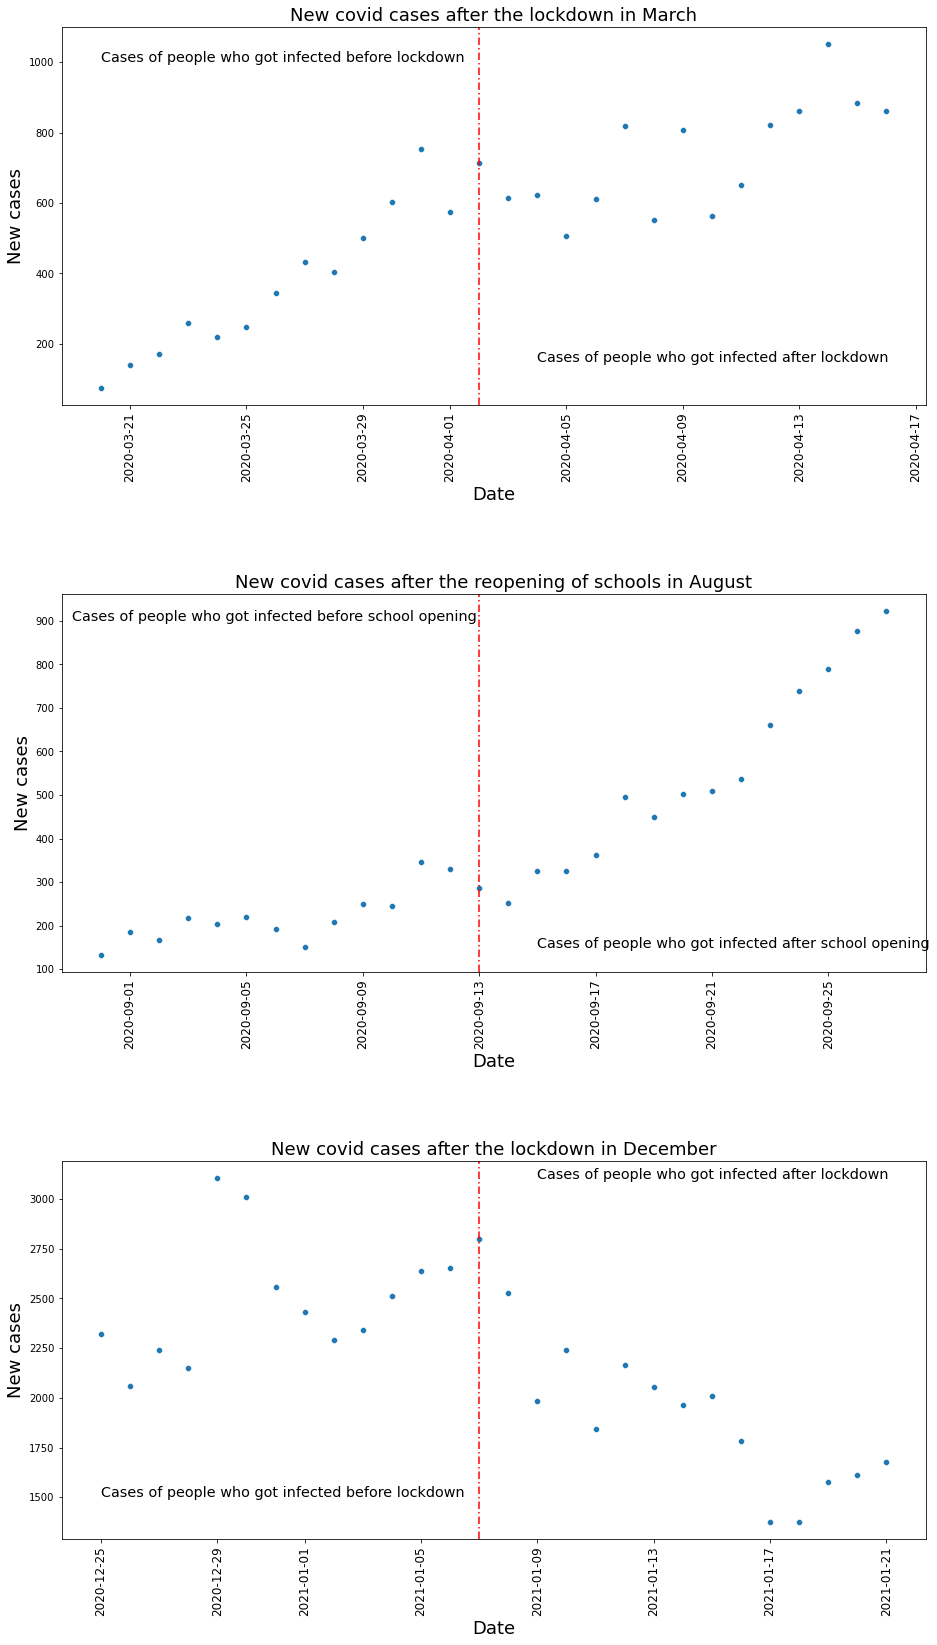

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=1,
                    hspace=0.5)

dates = (date1, date2, date3)

title = (
    'New covid cases after the lockdown in March',
    'New covid cases after the reopening of schools in August',
    'New covid cases after the lockdown in December'
)

sub_titles = (
    ('Before March lockdown', 'After March lockdown'), 
    ('Before school opening', 'After school opening'), 
    ('Before December lockdown', 'After December lockdown')
)

vertical_thresholds = (
    pd.to_datetime('2020-04-02'),
    pd.to_datetime('2020-09-13'),
    pd.to_datetime('2021-01-07'),
)

text_x_location = (
    (pd.to_datetime('2020-03-20'), pd.to_datetime('2020-04-04')),
    (pd.to_datetime('2020-08-30'), pd.to_datetime('2020-09-15')),
    (pd.to_datetime('2020-12-25'), pd.to_datetime('2021-01-09')),
)

text_y_location = (
    (1000, 150),
    (900, 150),
    (1500, 3100),
)

texts = (
    ('Cases of people who got infected before lockdown', 'Cases of people who got infected after lockdown'),
    ('Cases of people who got infected before school opening', 'Cases of people who got infected after school opening'),
    ('Cases of people who got infected before lockdown', 'Cases of people who got infected after lockdown'),
)


for i in range(3):

    sns.scatterplot(data = dates[i], x = 'Date', y = 'Nb_New_Cases', ax = ax[i])

    ax[i].axvline(vertical_thresholds[i], color = 'red', dashes = (5, 2, 1, 2))

    ax[i].set_title(title[i], fontsize = 18)

    ax[i].set_ylabel('New cases', fontsize = 18)

    ax[i].set_xlabel('Date', fontsize = 18)

    ax[i].tick_params(axis='x', labelrotation = 90, labelsize = 'large')
    
    ax[i].text(x = text_x_location[i][0], y = text_y_location[i][0], s = texts[i][0], size = 'x-large')
    
    ax[i].text(x = text_x_location[i][1], y = text_y_location[i][1], s = texts[i][1], size = 'x-large')

plt.show()


In [9]:
date1_pre = date1[(date1['Date'] >= '2020-03-20') & (date1['Date'] <= '2020-04-02')][['Nb_New_Cases']]

date1_post = date1[(date1['Date'] > '2020-04-02') & (date1['Date'] <= '2020-04-16')][['Nb_New_Cases']]

date2_pre = date2[(date2['Date'] >= '2020-08-31') & (date2['Date'] <= '2020-09-13')][['Nb_New_Cases']]

date2_post = date2[(date2['Date'] > '2020-09-13') & (date2['Date'] <= '2020-09-27')][['Nb_New_Cases']]

date3_pre = date3[(date3['Date'] >= '2020-12-25') & (date3['Date'] <= '2021-01-07')][['Nb_New_Cases']]

date3_post = date3[(date3['Date'] > '2020-01-07') & (date3['Date'] <= '2021-01-21')][['Nb_New_Cases']]


In [10]:
data = (
    (date1_pre, date1_post),
    (date2_pre, date2_post),
    (date3_pre, date3_post)
)

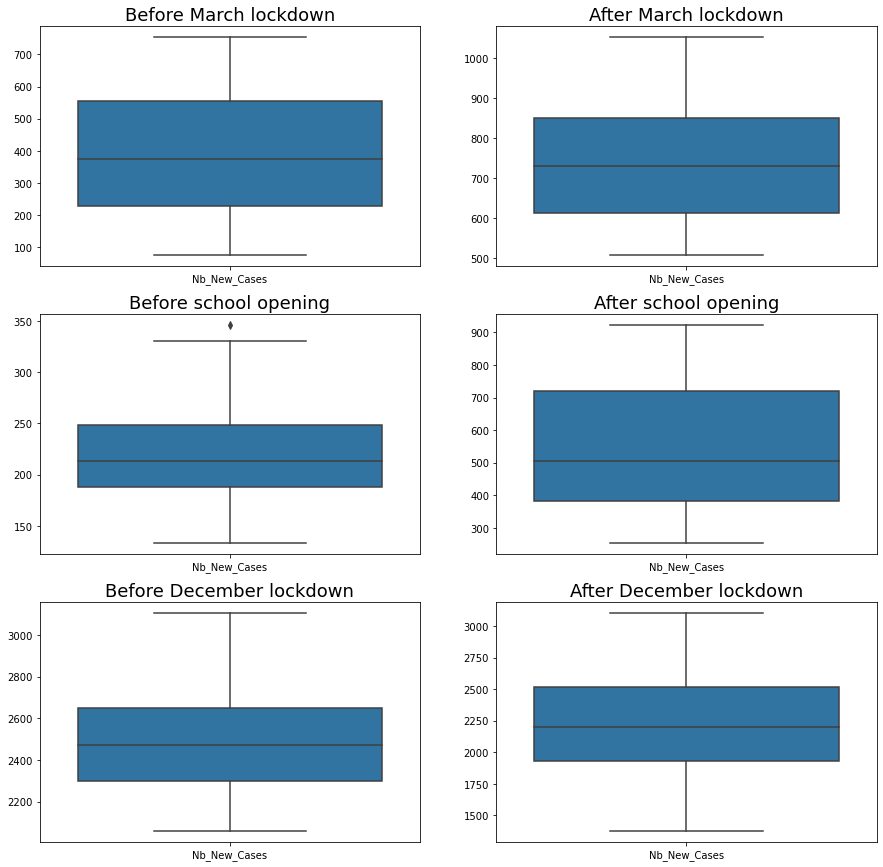

In [14]:
fig, ax = plt.subplots(3,2, figsize = (15,15))

for i in range(3):
    for j in range(2):
        sns.boxplot(data = data[i][j], ax = ax[i][j])
        ax[i][j].set_title(sub_titles[i][j], fontsize = 18)

plt.show()

In [15]:
date1_time_dummy = date1.assign(
    Time =  np.arange(len(date1.index))
)

date2_time_dummy = date2.assign(
    Time =  np.arange(len(date2.index))
)

date3_time_dummy = date3.assign(
    Time =  np.arange(len(date3.index))
)


In [16]:
x1_pre = date1_time_dummy.iloc[:14,2]
x1_post = date1_time_dummy.iloc[14:,2]
y1_pre = date1_time_dummy.iloc[:14,1]
y1_post = date1_time_dummy.iloc[14:,1]

x2_pre = date2_time_dummy.iloc[:14,2]
x2_post = date2_time_dummy.iloc[14:,2]
y2_pre = date2_time_dummy.iloc[:14,1]
y2_post = date2_time_dummy.iloc[14:,1]

x3_pre = date3_time_dummy.iloc[:14,2]
x3_post = date3_time_dummy.iloc[14:,2]
y3_pre = date3_time_dummy.iloc[:14,1]
y3_post = date3_time_dummy.iloc[14:,1]

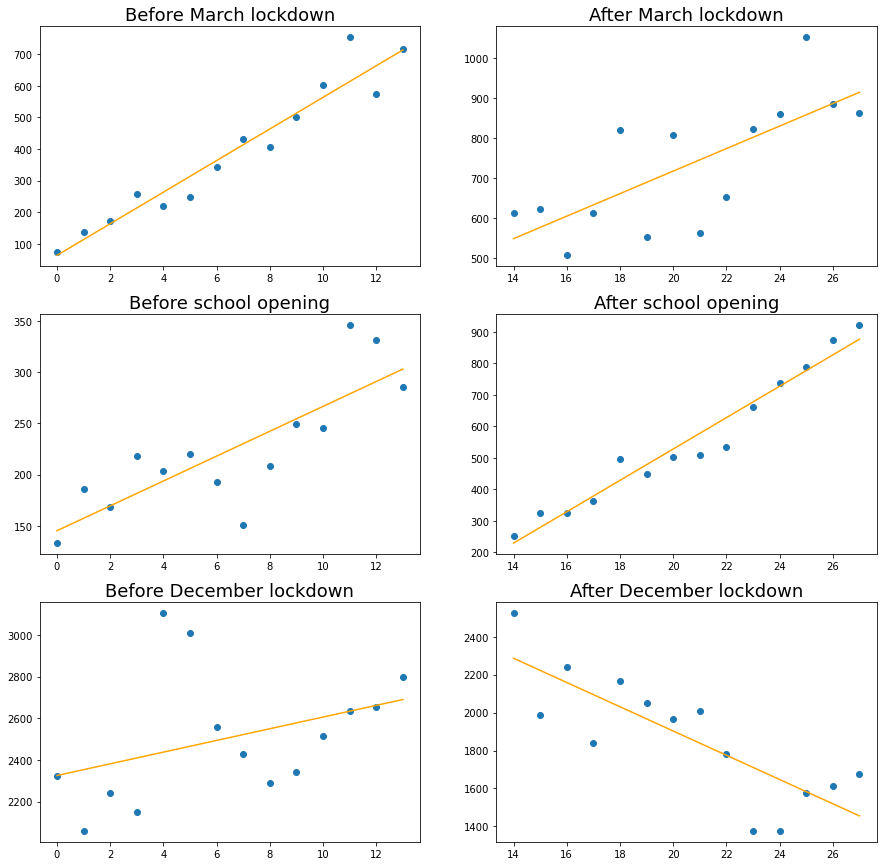

In [24]:
fig, ax = plt.subplots(3,2, figsize = (15,15))

regression_data = (
    ((x1_pre, y1_pre),(x1_post, y1_post)),
    ((x2_pre, y2_pre),(x2_post, y2_post)),
    ((x3_pre, y3_pre), (x3_post, y3_post)),
    )



for i in range(3):
    for j in range(2):
        
        lr = LinearRegression()

        lr.fit(regression_data[i][j][0].values.reshape(14,-1), regression_data[i][j][1])

        temp_co = lr.coef_

        temp_inter = lr.intercept_

        ax[i][j].scatter(x = regression_data[i][j][0], y = regression_data[i][j][1])
        
        ax[i][j].plot( regression_data[i][j][0], regression_data[i][j][0] * temp_co + temp_inter, color = 'orange')
        
        ax[i][j].set_title(sub_titles[i][j], fontsize = 18)